In [24]:
ls

gdrive/  sample_data/


# Importing the **libraries**

In [25]:
import numpy as np
import tensorflow 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential 

# Configure ImageDataGenerator class- Image Data **Augmentation**

In [26]:
train = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

# Apply Image DataGenerator Functionality To Trainset And Testset Loading the data and performing data **augmentation**

In [27]:
x_train = train.flow_from_directory(
    r'/content/gdrive/MyDrive/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2626 images belonging to 5 classes.


In [28]:
x_test = test.flow_from_directory(
    r'/content/gdrive/MyDrive/TEST_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse') 

Found 1095 images belonging to 6 classes.


In [29]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [30]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'TEST_SET': 4, 'WATERMELON': 5}


In [31]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

# CREATING THE MODEL--> Adding CNN **layers**

In [32]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding Dense **Layers**

In [33]:
# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax')) # softmax for more than 2

In [34]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [56]:
classifier.add(Dense(300,activation='relu'))
classifier.add(Dense(300,activation='relu'))

In [57]:
classifier.add(Dense(4,activation='softmax'))

# Compiling the **model**

In [37]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# Fitting the model-->TRAIN THE **MODEL**

In [43]:
len(x_train)

526

In [ ]:
classifier.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

# SAVE the **model**

In [59]:
classifier.save('train.h5')

In [60]:
classifier.save('dataset.h5')

In [45]:
classifier.save('nutrition.h5')

# Testing the **Model**

In [61]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [65]:
img=image.load_img(r"/content/gdrive/MyDrive/TEST_SET/PINEAPPLE/125_100.jpg" )


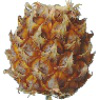

In [66]:
img

In [67]:
img=image.load_img(r"/content/gdrive/MyDrive/TEST_SET/PINEAPPLE/125_100.jpg",target_size=(64,64))

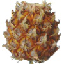

In [68]:
img

In [69]:
x=image.img_to_array(img)

In [70]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [71]:
x=np.expand_dims(x,axis=0)

In [72]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [73]:
pred = model.predict

In [74]:
pred

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f6951d08950>>

In [75]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

219/219 [==============================] - 154s 705ms/step


In [76]:
predict_x

array([[9.9923861e-01, 1.7781427e-17, 8.7100233e-10, 7.6138246e-04,
        2.1381262e-17],
       [2.2820778e-07, 9.9854529e-01, 5.4625247e-07, 1.1746756e-04,
        1.3363739e-03],
       [6.2520186e-08, 3.7425080e-10, 9.9999976e-01, 1.4628483e-07,
        1.9199799e-19],
       ...,
       [6.1323731e-06, 1.5049831e-09, 1.0855013e-08, 9.9999380e-01,
        6.8422483e-11],
       [6.4206245e-09, 2.2439221e-12, 1.0000000e+00, 2.4997491e-09,
        4.2224121e-23],
       [3.0874507e-08, 9.9974817e-01, 3.5721914e-07, 2.5893965e-05,
        2.2563062e-04]], dtype=float32)

In [77]:
classes_x

array([0, 1, 2, ..., 3, 2, 1])

In [78]:
x_test.class_indices

{'APPLES': 0,
 'BANANA': 1,
 'ORANGE': 2,
 'PINEAPPLE': 3,
 'TEST_SET': 4,
 'WATERMELON': 5}

In [79]:
index=['APPLE','BANANA','ORANGE','PINEAPPLE','WATERMELON']

In [80]:
result=str(index[classes_x[0]])
result

'APPLE'